Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score, f1_score,accuracy_score, mean_absolute_error

In [3]:
data = pd.read_csv('data/wiki4HE.csv',sep = ';')

Preprocessing

In [4]:
data

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2,1,14,1,2,?,?,0,...,3,5,5,5,5,4,4,4,1,2
1,42,0,5,1,18,1,2,?,?,0,...,2,4,4,3,4,2,2,4,2,4
2,37,0,4,1,13,1,3,?,?,0,...,1,5,3,5,5,2,2,2,1,3
3,40,0,4,0,13,1,3,?,?,0,...,3,3,4,4,3,4,4,3,3,4
4,51,0,6,0,8,1,3,?,?,1,...,5,5,5,4,4,5,5,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,43,0,5,1,21,2,?,?,2,0,...,2,2,2,2,2,?,?,?,?,?
909,53,0,6,0,25,2,?,?,6,0,...,4,4,3,3,4,4,4,4,1,1
910,39,0,5,1,9,2,?,?,4,0,...,2,5,4,3,?,5,5,5,4,1
911,40,0,3,1,10,2,?,?,2,0,...,5,1,5,2,2,4,4,2,1,1


In [5]:
data = data.replace('?',np.nan)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             913 non-null    int64 
 1   GENDER          913 non-null    int64 
 2   DOMAIN          911 non-null    object
 3   PhD             913 non-null    int64 
 4   YEARSEXP        890 non-null    object
 5   UNIVERSITY      913 non-null    int64 
 6   UOC_POSITION    800 non-null    object
 7   OTHER_POSITION  652 non-null    object
 8   OTHERSTATUS     373 non-null    object
 9   USERWIKI        909 non-null    object
 10  PU1             906 non-null    object
 11  PU2             902 non-null    object
 12  PU3             908 non-null    object
 13  PEU1            909 non-null    object
 14  PEU2            899 non-null    object
 15  PEU3            816 non-null    object
 16  ENJ1            906 non-null    object
 17  ENJ2            896 non-null    object
 18  Qu1       

In [7]:
data.isna().sum()

AGE                 0
GENDER              0
DOMAIN              2
PhD                 0
YEARSEXP           23
UNIVERSITY          0
UOC_POSITION      113
OTHER_POSITION    261
OTHERSTATUS       540
USERWIKI            4
PU1                 7
PU2                11
PU3                 5
PEU1                4
PEU2               14
PEU3               97
ENJ1                7
ENJ2               17
Qu1                 7
Qu2                10
Qu3                15
Qu4                22
Qu5                29
Vis1               72
Vis2              117
Vis3                8
Im1                22
Im2                20
Im3                57
SA1                11
SA2                12
SA3                11
Use1               14
Use2               17
Use3                9
Use4               23
Use5               15
Pf1                11
Pf2                 6
Pf3                14
JR1                27
JR2                53
BI1                32
BI2                43
Inc1               35
Inc2      

In [8]:
wiki_df = data.drop(columns = ['UNIVERSITY','UOC_POSITION','OTHERSTATUS','OTHER_POSITION', 'Vis2', 'PEU3', 'Im3'])
wiki_df = wiki_df.dropna()

In [9]:
wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 0 to 907
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AGE       643 non-null    int64 
 1   GENDER    643 non-null    int64 
 2   DOMAIN    643 non-null    object
 3   PhD       643 non-null    int64 
 4   YEARSEXP  643 non-null    object
 5   USERWIKI  643 non-null    object
 6   PU1       643 non-null    object
 7   PU2       643 non-null    object
 8   PU3       643 non-null    object
 9   PEU1      643 non-null    object
 10  PEU2      643 non-null    object
 11  ENJ1      643 non-null    object
 12  ENJ2      643 non-null    object
 13  Qu1       643 non-null    object
 14  Qu2       643 non-null    object
 15  Qu3       643 non-null    object
 16  Qu4       643 non-null    object
 17  Qu5       643 non-null    object
 18  Vis1      643 non-null    object
 19  Vis3      643 non-null    object
 20  Im1       643 non-null    object
 21  Im2       643 no

Nominal:
    GENDER
    DOMAIN
    PhD
    UNIVERSITY
    USERWIKI
Ordinal:
    PU1
    PU2
    PU3
    PEU1
    PEU2
    ENJ1
    ENJ2
    Qu1
    Qu2
    Qu3
    Qu4
    Qu5
    Vis1
    Vis3
    Im1
    Im2
    SA1
    SA2
    SA3
    Use1
    Use2
    Use3
    Use4
    Use5
    Pf1 
    Pf2
    Pf3
    JR1
    JR2
    BI1
    BI2
    Inc1
    Inc2
    Inc3
    Inc4
    Exp1
    Exp2
    Exp3
    Exp4
    Exp5

In [10]:
nominal = ['GENDER', 'DOMAIN','PhD','USERWIKI']
ordinal = ['PU1','PU2','PU3','PEU1',
         'PEU2','ENJ1','ENJ2','Qu1','Qu2','Qu3','Qu4','Qu5','Vis1','Vis3','Im1','Im2',
         'SA1','SA2','SA3','Use1','Use2','Use3','Use4','Use5','Pf1','Pf2','Pf3','JR1','JR2',
         'BI1','BI2','Inc1','Inc2','Inc3','Inc4','Exp1','Exp2','Exp3','Exp4','Exp5']

Maybe?
pd.get_dummies(wiki_df, columns = nominal)

wiki_df[ordinal] = wiki_df[ordinal].apply(lambda x: pd.factorize(x)[0])

In [11]:
ohe = OneHotEncoder(sparse = False)
oe = OrdinalEncoder()

In [12]:
ohe.fit_transform(wiki_df[nominal])
oe.fit_transform(wiki_df[ordinal])

array([[3., 3., 2., ..., 3., 0., 1.],
       [1., 2., 2., ..., 3., 1., 3.],
       [1., 1., 1., ..., 1., 0., 2.],
       ...,
       [4., 4., 4., ..., 4., 2., 3.],
       [1., 1., 2., ..., 3., 0., 0.],
       [1., 2., 1., ..., 2., 0., 0.]])

In [13]:
X1 = wiki_df.drop(columns = ['PU2'])
y1 = wiki_df.PU2

X2 = wiki_df.drop(columns = ['PU3'])
y2 = wiki_df.PU3

s1 = SelectKBest(score_func = chi2, k = 'all')
s2 = SelectKBest(score_func = chi2, k = 'all')
pu2 = s1.fit(X1, y1)
pu3 = s2.fit(X2, y2)

for i in range(len(pu2.scores_)):
    print(i,'\t',pu2.scores_[i], '\t', pu3.scores_[i])

0 	 1.7637098888380602 	 6.036735926952565
1 	 9.446205751937722 	 13.460787776972271
2 	 2.40066900414383 	 12.404301413440663
3 	 0.8991641294703624 	 1.17031262800745
4 	 10.965157014089435 	 2.388116243679221
5 	 18.431984933485186 	 26.28522973467487
6 	 112.91998152657808 	 94.4552842338077
7 	 87.89541011084528 	 83.73177794734991
8 	 3.8137827919229927 	 3.7852377091522347
9 	 11.33907518568413 	 11.87568282980748
10 	 33.83577615356295 	 29.56451200493642
11 	 19.713003019530493 	 16.74677239584799
12 	 29.214841901875637 	 44.88204639723157
13 	 22.480076464427853 	 29.783069070047
14 	 25.660219685308732 	 27.898543181503502
15 	 9.652352303456032 	 12.990911159506481
16 	 40.75649238780365 	 57.35068252516701
17 	 44.18753817059505 	 30.97833934276913
18 	 66.77451036489767 	 86.14551423629368
19 	 37.2528893739773 	 45.890147281202076
20 	 6.822927439363998 	 7.503612092988565
21 	 6.514558354597677 	 11.545885557805915
22 	 5.059769937973495 	 7.177058232566562
23 	 5.282

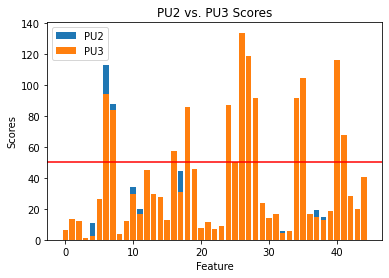

In [14]:
plt.bar([i for i in range(len(pu2.scores_))], pu2.scores_, label = 'PU2')
plt.bar([i for i in range(len(pu3.scores_))], pu3.scores_, label = 'PU3')
plt.legend()
plt.ylabel('Scores')
plt.title('PU2 vs. PU3 Scores')
plt.xlabel('Feature')
plt.axhline(y=50, color='r', linestyle='-')
plt.show()

In [15]:
best = SelectKBest(score_func=chi2, k=13).fit(X2,y2)

In [16]:
cols = best.get_support(indices=True)
X = wiki_df.iloc[:,cols]

In [17]:
X

,PU1,PU2,Qu4,Vis1,SA3,Use1,Use2,Use3,Use4,JR2,BI1,Inc4,Exp1
0,4,4,2,3,4,3,1,1,2,1,2,5,4
1,2,3,3,3,4,2,2,1,1,3,2,4,2
2,2,2,5,2,4,1,1,1,1,3,1,5,2
3,3,3,3,3,5,3,3,3,3,4,3,3,4
4,4,3,3,4,5,3,3,5,5,3,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2,3,3,2,4,2,1,2,2,3,2,3,3
901,3,4,3,2,5,3,1,1,2,1,1,4,4
903,5,5,3,4,5,4,3,5,3,2,5,4,5
905,2,2,4,2,5,1,1,1,2,2,1,5,4


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size = 0.2) 

Processing

Decision Tree

In [19]:
DT = DecisionTreeClassifier(max_depth = 3)
DT.fit(X_train,y_train)

pred1 = DT.predict(X_test)
a1 = accuracy_score(y_test,pred1)
f1 = f1_score(y_test,pred1, average = 'macro')
mae1 = mean_absolute_error(y_test,pred1)
mod1 = [a1, f1, mae1]

print(a1)
print(f1)
print(mae1)

0.5736434108527132
0.4523433739938594
0.49612403100775193


Logistic Regression

In [20]:
LR = LogisticRegression(solver = 'newton-cg')
LR.fit(X_train,y_train)

pred2 = LR.predict(X_test)
a2 = accuracy_score(y_test,pred2)
f2 = f1_score(y_test,pred2, average = 'macro')
mae2 = mean_absolute_error(y_test,pred2)
mod2 = [a2, f2, mae2]

print(a2)
print(f2)
print(mae2)

0.5736434108527132
0.4524288626288874
0.5116279069767442


Support Vector Machine

In [21]:
SVM = SVC().fit(X_train,y_train)

pred3 = SVM.predict(X_test)
a3 = accuracy_score(y_test,pred3)
f3 = f1_score(y_test,pred3, average = 'macro')
mae3 = mean_absolute_error(y_test,pred3)
mod3 = [a3, f3, mae3]

print(a3)
print(f3)
print(mae3)

0.6124031007751938
0.48991944757487776
0.4496124031007752


Gaussian Naive Bayes

In [22]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)

pred4 = GNB.predict(X_test)
a4 = accuracy_score(y_test, pred4)
f4 = f1_score(y_test, pred4, average = 'macro')
mae4 = mean_absolute_error(y_test, pred4)
mod4 = [a4, f4, mae4]

print(a4)
print(f4)
print(mae4)

0.5193798449612403
0.5011836623884818
0.5426356589147286


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


Multionimial Naive Bayes

In [23]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)

pred5 = MNB.predict(X_test)
a5 = accuracy_score(y_test,pred5)
f5 = f1_score(y_test,pred5, average = 'macro')
mae5 = mean_absolute_error(y_test,pred5)
mod5 = [a5, f5, mae5]

print(a5)
print(f5)
print(mae5)

0.4806201550387597
0.3645686291663021
0.6201550387596899


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


K Nearest Neighbor

In [24]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

pred6 = KNN.predict(X_test)
a6 = accuracy_score(y_test,pred6)
f6 = f1_score(y_test,pred6, average = 'macro')
mae6 = mean_absolute_error(y_test,pred6)
mod6 = [a6, f6, mae6]

print(a6)
print(f6)
print(mae6)

0.46511627906976744
0.42992976016231826
0.6356589147286822


Random Forest

In [25]:
RF = RandomForestClassifier(max_depth = 7)
RF.fit(X_train,y_train)

pred7 = RF.predict(X_test)
a7 = accuracy_score(y_test,pred7)
f7 = f1_score(y_test,pred7, average = 'macro')
mae7 = mean_absolute_error(y_test,pred7)
mod7 = [a7, f7, mae7]

print(a7)
print(f7)
print(mae7)

0.5813953488372093
0.46547757207331675
0.4728682170542636


Gradient Boosting

In [26]:
GB = GradientBoostingClassifier()
GB.fit(X_train,y_train)

pred8 = GB.predict(X_test)
a8 = accuracy_score(y_test,pred8)
f8 = f1_score(y_test,pred8, average = 'macro')
mae8 = mean_absolute_error(y_test,pred8)
mod8 = [a8, f8, mae8]

print(a8)
print(f8)
print(mae8)

0.5658914728682171
0.5489151450053705
0.5116279069767442


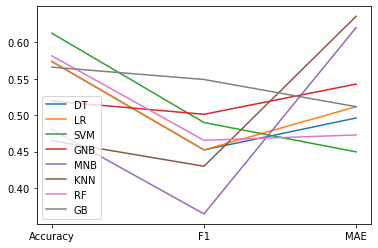

In [27]:
plt.plot(mod1, label = 'DT')
plt.plot(mod2, label = 'LR')
plt.plot(mod3, label = 'SVM')
plt.plot(mod4, label = 'GNB')
plt.plot(mod5, label = 'MNB')
plt.plot(mod6, label = 'KNN')
plt.plot(mod7, label = 'RF')
plt.plot(mod8, label = 'GB')
plt.legend()
plt.xticks(ticks = [0,1,2], labels = ['Accuracy','F1','MAE'])
plt.show()